In [1]:
from openfe_benchmarks.tyk2 import system

In [2]:
ligand_network, protein, solvent = system.get_components()

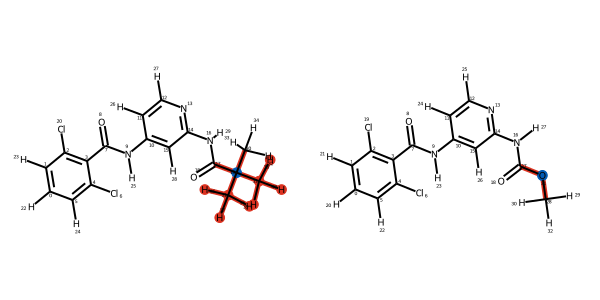

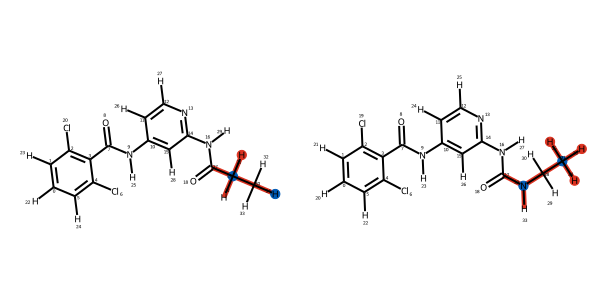

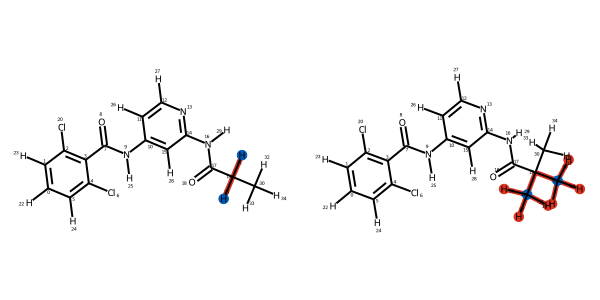

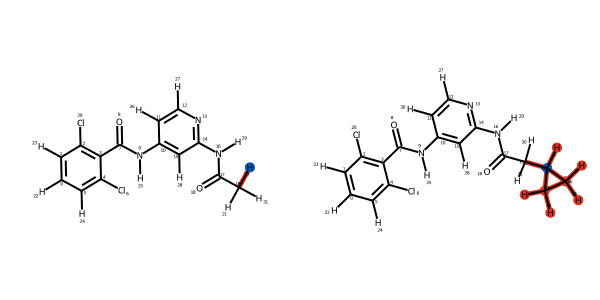

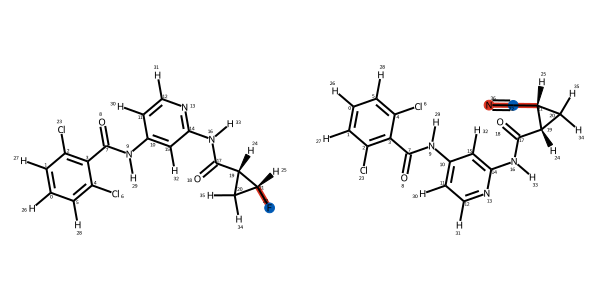

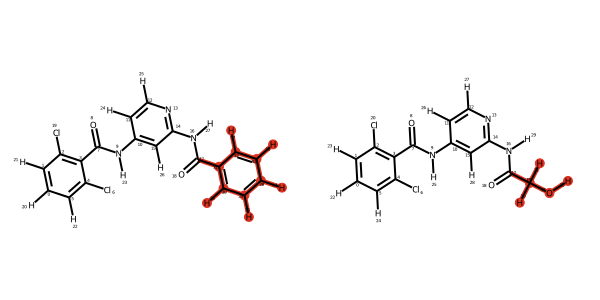

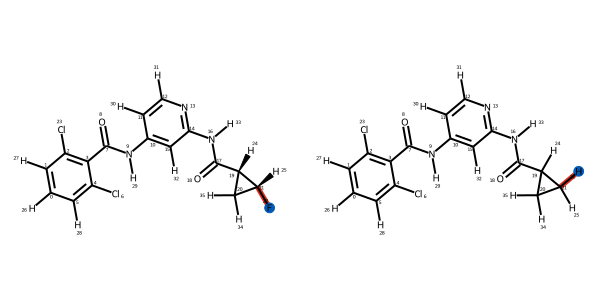

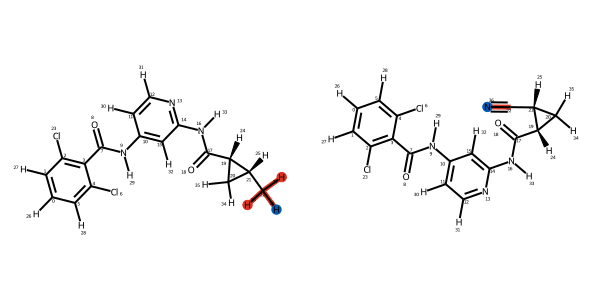

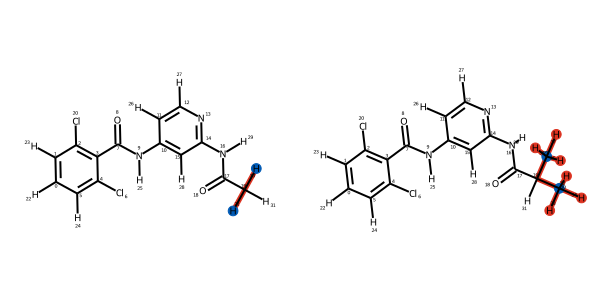

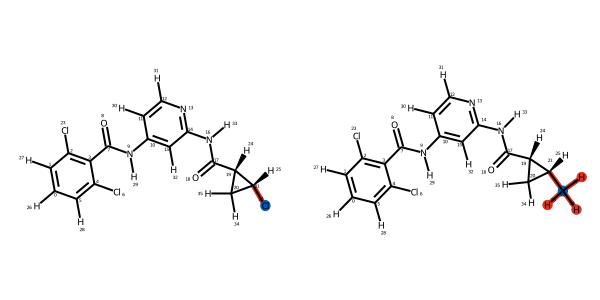

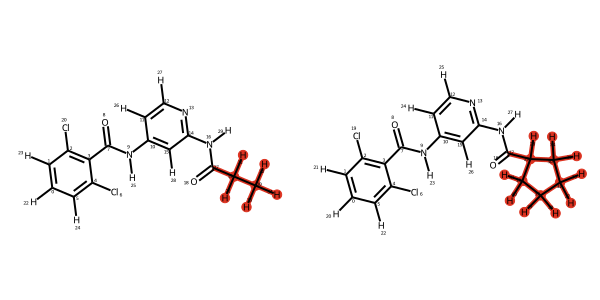

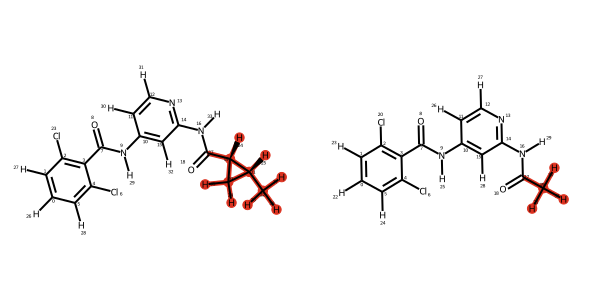

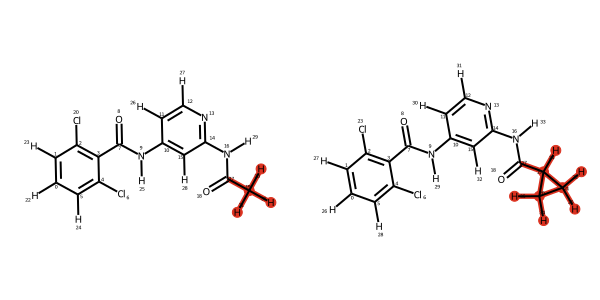

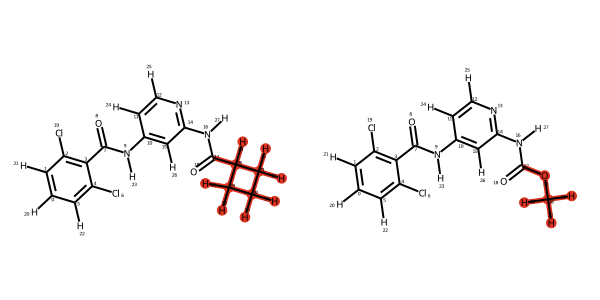

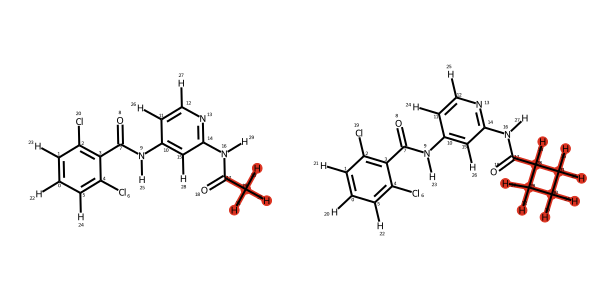

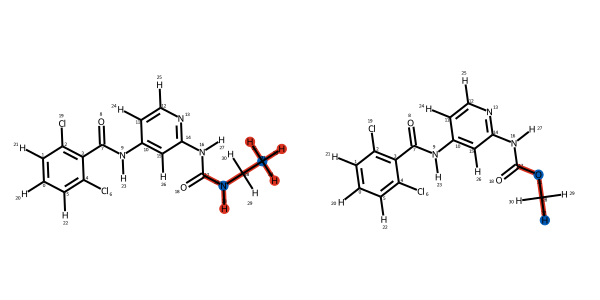

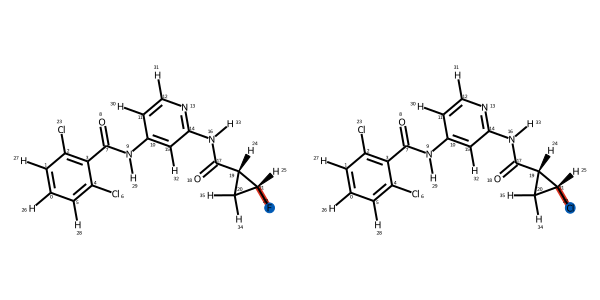

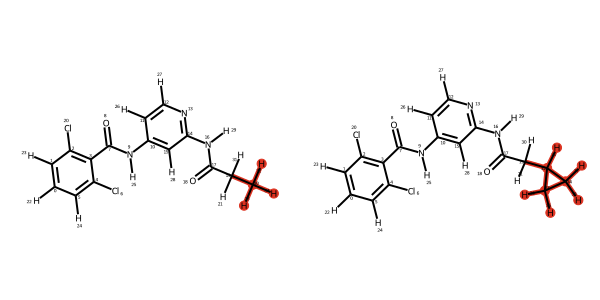

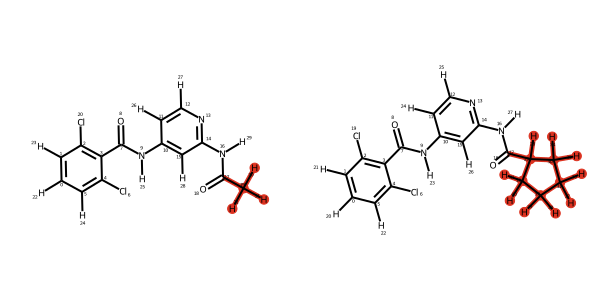

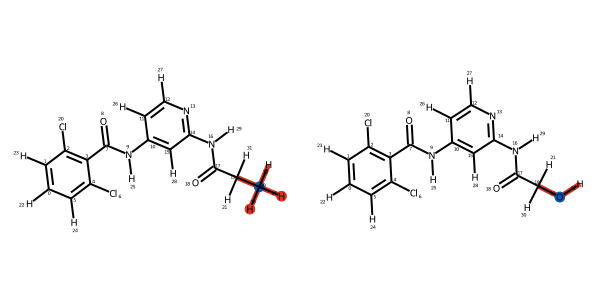

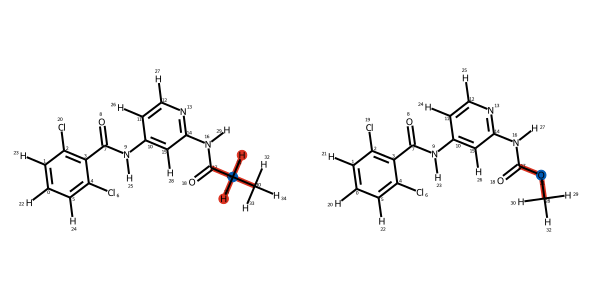

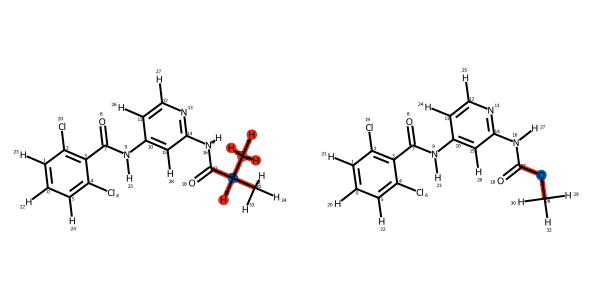

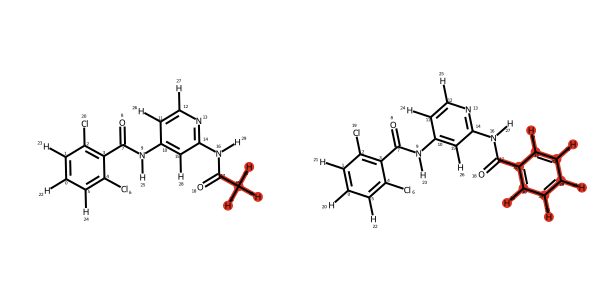

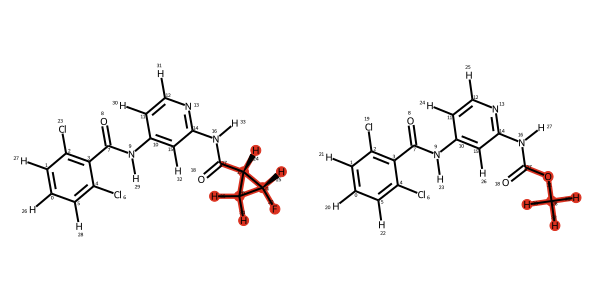

In [4]:
edges = [edge for edge in ligand_network.edges]
for edge in edges:
    display(edge)

In [28]:
from openfe.setup.methods.openmm.equil_rbfe_methods import RelativeLigandTransform
from openff.units import unit

settings = RelativeLigandTransform.get_default_settings()

settings.simulation_settings.equilibration_length = 1000 * unit.picosecond
settings.simulation_settings.production_length = 5000 * unit.picosecond

In [29]:
import copy
from openfe.setup import ChemicalSystem

solvent_transforms = []

for edge in edges:
    stateA = ChemicalSystem({'ligand': edge.molA,
                             'solvent': solvent})
    stateB = ChemicalSystem({'ligand': edge.molB,
                             'solvent': solvent})
    simset = copy.deepcopy(settings)
    simset.simulation_settings.output_filename = f"{edge.molA.name}_{edge.molB.name}_solvent.nc"
    simset.simulation_settings.checkpoint_storage = f"{edge.molA.name}_{edge.molB.name}_solvent_checkpoint.nc"
    transform = RelativeLigandTransform(
        stateA=stateA, stateB=stateB, ligandmapping=edge,
        settings=simset
    )
    solvent_transforms.append(transform)

In [30]:
import copy
from openfe.setup import ChemicalSystem

complex_transforms = []

for edge in edges:
    stateA = ChemicalSystem({'ligand': edge.molA,
                             'solvent': solvent,
                             'protein': protein})
    stateB = ChemicalSystem({'ligand': edge.molB,
                             'solvent': solvent,
                             'protein': protein})
    simset = copy.deepcopy(settings)
    simset.simulation_settings.output_filename = f"{edge.molA.name}_{edge.molB.name}_complex.nc"
    simset.simulation_settings.checkpoint_storage = f"{edge.molA.name}_{edge.molB.name}_complex_checkpoint.nc"
    transform = RelativeLigandTransform(
        stateA=stateA, stateB=stateB, ligandmapping=edge,
        settings=simset
    )
    complex_transforms.append(transform)

In [31]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [32]:
solvent_transforms[2].run(verbose=True)

#for sim in solvent_transforms:
#    sim.run(dry=True, verbose=True)

INFO:	creating hybrid system
INFO:	Requested to generate parameters for residue <Residue 0 (ligand_42) of chain 0>
INFO:	Generating a residue template for [H][c]1[n][c]([N]([H])[C](=[O])[C]([H])([H])[C]([H])([H])[H])[c]([H])[c]([N]([H])[C](=[O])[c]2[c]([Cl])[c]([H])[c]([H])[c]([H])[c]2[Cl])[c]1[H] using openff-2.0.0.offxml
INFO:	Requested to generate parameters for residue <Residue 1517 (ligand_44) of chain 3>
INFO:	Generating a residue template for [H][c]1[n][c]([N]([H])[C](=[O])[C]([C]([H])([H])[H])([C]([H])([H])[H])[C]([H])([H])[H])[c]([H])[c]([N]([H])[C](=[O])[c]2[c]([Cl])[c]([H])[c]([H])[c]([H])[c]2[Cl])[c]1[H] using openff-2.0.0.offxml
INFO:	creating hybrid system
INFO:	setting force field terms
INFO:	adding forces
INFO:	DONE
/biggin/b192/bioc1523/work2/OpenFE/openfe/openfe/setup/_rbfe_utils/multistate.py:85: UserWarning: setting number of replicas to number of states: 11
  warnings.warn(msg)


Please cite the following:

        Friedrichs MS, Eastman P, Vaidyanathan V, Houston M, LeGrand S, Beberg AL, Ensign DL, Bruns CM, and Pande VS. Accelerating molecular dynamic simulations on graphics processing unit. J. Comput. Chem. 30:864, 2009. DOI: 10.1002/jcc.21209
        Eastman P and Pande VS. OpenMM: A hardware-independent framework for molecular simulations. Comput. Sci. Eng. 12:34, 2010. DOI: 10.1109/MCSE.2010.27
        Eastman P and Pande VS. Efficient nonbonded interactions for molecular dynamics on a graphics processing unit. J. Comput. Chem. 31:1268, 2010. DOI: 10.1002/jcc.21413
        Eastman P and Pande VS. Constant constraint matrix approximation: A robust, parallelizable constraint method for molecular simulations. J. Chem. Theor. Comput. 6:434, 2010. DOI: 10.1021/ct900463w
        Chodera JD and Shirts MR. Replica exchange and expanded ensemble simulations as Gibbs multistate: Simple improvements for enhanced mixing. J. Chem. Phys., 135:194110, 2011. DOI:10.1063/

INFO:	minimizing systems
INFO:	equilibrating systems
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [39:24<00:00,  4.73s/it]
INFO:	running production phase
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [3:19:18<00:00,  4.78s/it]


True

In [38]:
complex_transforms[2].run(verbose=True)

INFO:	creating hybrid system
INFO:	Requested to generate parameters for residue <Residue 290 (ligand_42) of chain 1>
INFO:	Generating a residue template for [H][c]1[n][c]([N]([H])[C](=[O])[C]([H])([H])[C]([H])([H])[H])[c]([H])[c]([N]([H])[C](=[O])[c]2[c]([Cl])[c]([H])[c]([H])[c]([H])[c]2[Cl])[c]1[H] using openff-2.0.0.offxml
INFO:	Requested to generate parameters for residue <Residue 19391 (ligand_44) of chain 4>
INFO:	Generating a residue template for [H][c]1[n][c]([N]([H])[C](=[O])[C]([C]([H])([H])[H])([C]([H])([H])[H])[C]([H])([H])[H])[c]([H])[c]([N]([H])[C](=[O])[c]2[c]([Cl])[c]([H])[c]([H])[c]([H])[c]2[Cl])[c]1[H] using openff-2.0.0.offxml
INFO:	creating hybrid system
INFO:	setting force field terms
INFO:	adding forces
INFO:	DONE
/biggin/b192/bioc1523/work2/OpenFE/openfe/openfe/setup/_rbfe_utils/multistate.py:85: UserWarning: setting number of replicas to number of states: 11
  warnings.warn(msg)


Please cite the following:

        Friedrichs MS, Eastman P, Vaidyanathan V, Houston M, LeGrand S, Beberg AL, Ensign DL, Bruns CM, and Pande VS. Accelerating molecular dynamic simulations on graphics processing unit. J. Comput. Chem. 30:864, 2009. DOI: 10.1002/jcc.21209
        Eastman P and Pande VS. OpenMM: A hardware-independent framework for molecular simulations. Comput. Sci. Eng. 12:34, 2010. DOI: 10.1109/MCSE.2010.27
        Eastman P and Pande VS. Efficient nonbonded interactions for molecular dynamics on a graphics processing unit. J. Comput. Chem. 31:1268, 2010. DOI: 10.1002/jcc.21413
        Eastman P and Pande VS. Constant constraint matrix approximation: A robust, parallelizable constraint method for molecular simulations. J. Chem. Theor. Comput. 6:434, 2010. DOI: 10.1021/ct900463w
        Chodera JD and Shirts MR. Replica exchange and expanded ensemble simulations as Gibbs multistate: Simple improvements for enhanced mixing. J. Chem. Phys., 135:194110, 2011. DOI:10.1063/

INFO:	minimizing systems
INFO:	equilibrating systems
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [4:27:33<00:00, 32.11s/it]
INFO:	running production phase
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [22:26:58<00:00, 32.33s/it]


True